<a href="https://colab.research.google.com/github/surajvkurde/CMLDataScience/blob/main/EDA_KNN_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Read dataset in dataframe**

In [22]:
import pandas as pd
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


#**Check dataset features**

In [24]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

**check if dataset classes are balanced or not**


In [26]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**import packages and libraries**

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

**Display scatter plot using matplotlib, for any set of features**

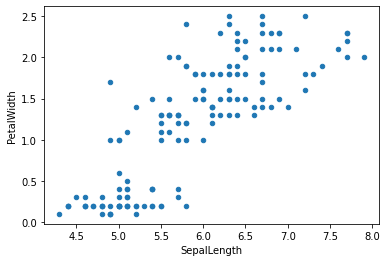

In [30]:
df.plot(kind="scatter",x="SepalLengthCm",y="PetalWidthCm")
plt.xlabel("SepalLength")
plt.ylabel("PetalWidth")
plt.show()

**Display scatterplot using seaborn FacetGrid()**
hue is used to color points on plot for matching species type

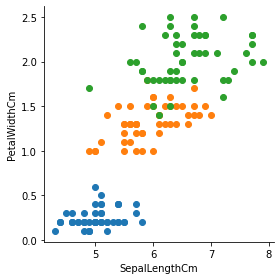

In [33]:
sns.FacetGrid(df,hue="Species",height=4).map(plt.scatter,"SepalLengthCm","PetalWidthCm")

**Add legend to scatter plot**

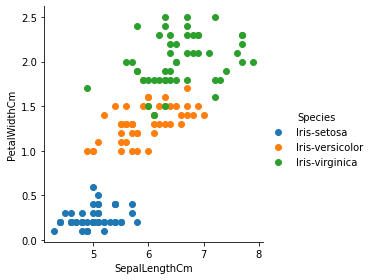

In [34]:
sns.FacetGrid(df,hue="Species",height=4).map(plt.scatter,"SepalLengthCm","PetalWidthCm").add_legend()

In [42]:
df=df.drop(['Id'],axis=1)

**Display pairplot using seaborn.paiplot()**

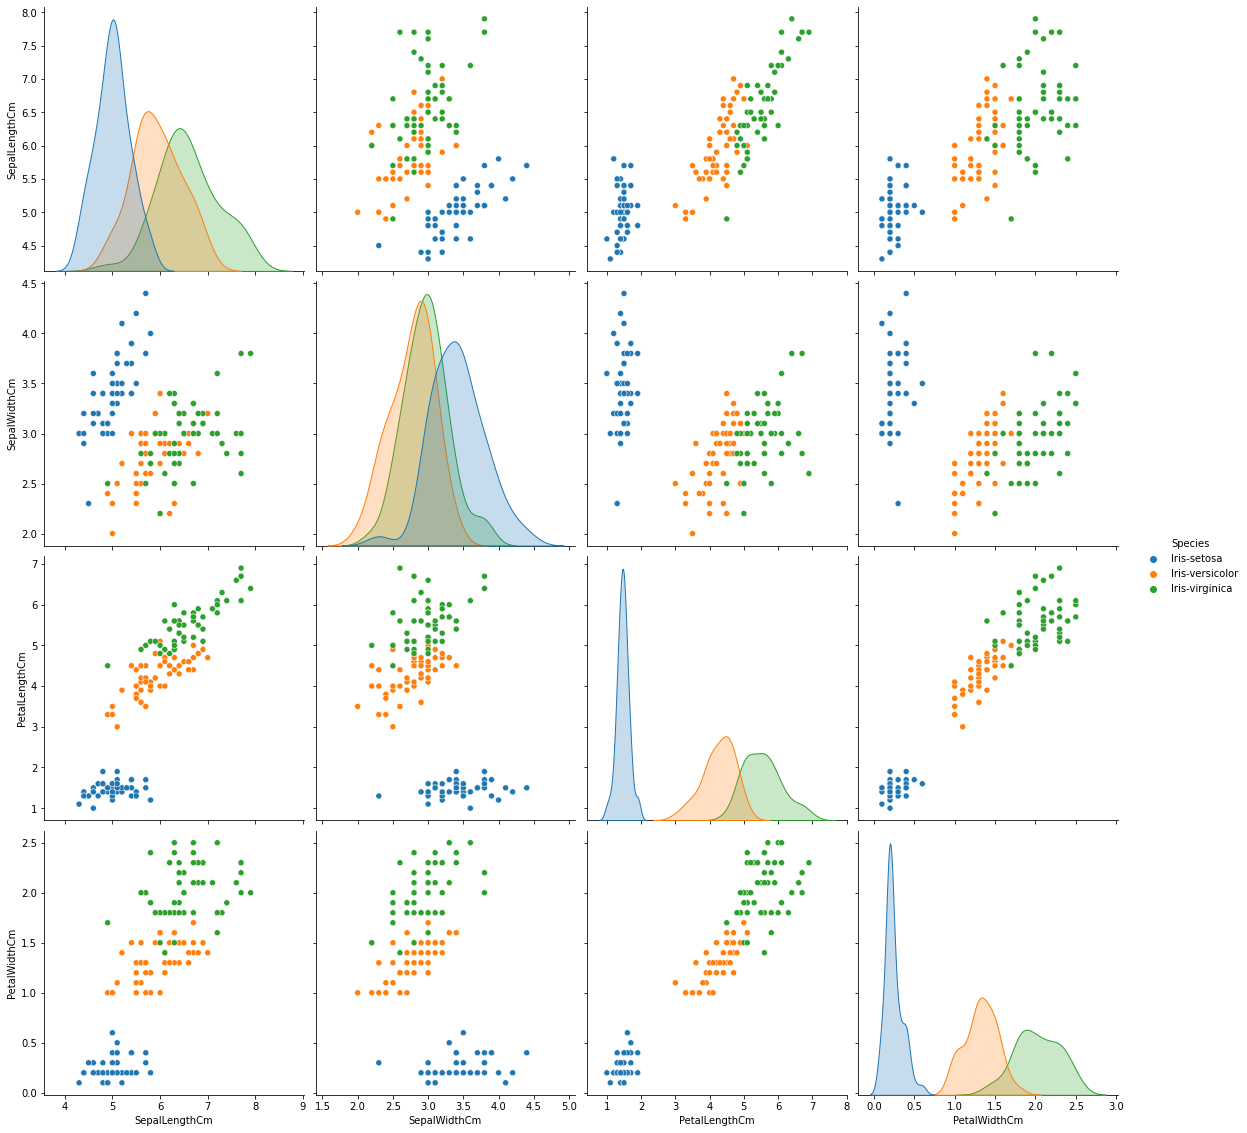

In [43]:
sns.pairplot(df,hue="Species",height=4)

**Display boxplot for all Species**
We can observe outliers and percentile values for each features

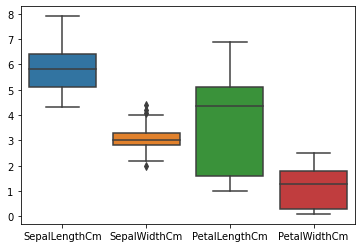

In [46]:
sns.boxplot(data=df)

**Display violin plot, similar to boxplot. But it will consider volume / number of entries for perticular value**

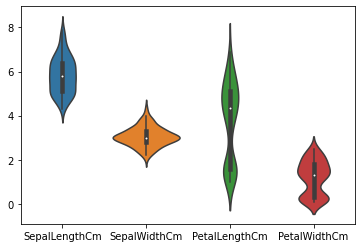

In [47]:
sns.violinplot(data=df)

#**import libraries for classification / prediction**

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#here we will see use KNN algorithm
#accuracy_score() will claculate accuracy of algorithm's pediction
#train_test_split will split data in training and testing set

**Seperate out X (independent / input for module training and testing) and y (dependent/to be predicted / classes of dataset) part of dataset and further train and test samples**

In [50]:
y=df['Species']
x=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
x.shape,y.shape

((150, 4), (150,))

**Split data in training dataset and testing dataset for module training and testing. For validation we can use new dataset**

In [53]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [57]:
min=1
bestK=0
for i in  range (1,30):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    
    y_pred_train=neigh.predict(X_train)
    accuracy_train=accuracy_score(y_train, y_pred_train)
    
    y_pred_test=neigh.predict(X_test)
    accuracy_test=accuracy_score(y_test, y_pred_test)
    
    if (accuracy_train-accuracy_test)<min:
      min=accuracy_train-accuracy_test
      bestK=i
      print('K value',i)
      print('*'*50)
      print('Accuracy for train data ',accuracy_train)
      print('Accuracy for test data',accuracy_test)
      print('*'*50)
      print('-'*50)
print("K should be ",bestK)

K value 1
**************************************************
Accuracy for train data  1.0
Accuracy for test data 0.9736842105263158
**************************************************
--------------------------------------------------
K value 2
**************************************************
Accuracy for train data  0.9642857142857143
Accuracy for test data 0.9736842105263158
**************************************************
--------------------------------------------------
K value 10
**************************************************
Accuracy for train data  0.9464285714285714
Accuracy for test data 0.9736842105263158
**************************************************
--------------------------------------------------
K value 13
**************************************************
Accuracy for train data  0.9553571428571429
Accuracy for test data 1.0
**************************************************
--------------------------------------------------
K value 16
*********************

In [58]:
print(y_pred_train)

['Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'I

In [59]:
print(y_pred_test)

['Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica']


In [60]:
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')

In [61]:
neigh.predict_proba(X_test)

array([[1.        , 0.        , 0.        ],
       [0.        , 0.10344828, 0.89655172],
       [0.        , 0.03448276, 0.96551724],
       [0.        , 1.        , 0.        ],
       [0.        , 0.79310345, 0.20689655],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.82758621, 0.17241379],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.03448276, 0.96551724],
       [0.        , 0.48275862, 0.51724138],
       [1.        , 0.        , 0.        ],
       [0.        , 0.48275862, 0.51724138],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.